# Imports

In [1]:
import pandas as pd

In [2]:
import copy
from stable_baselines3 import DQN
import os
from sb3_contrib import MaskablePPO

from sb3_contrib.common.maskable.evaluation import evaluate_policy

from sb3_contrib.common.maskable.utils import get_action_masks

from sb3_contrib.common.maskable.callbacks import MaskableEvalCallback
from env import Environment
import numpy as np

2024-12-20 15:42:00.746660: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 15:42:00.747895: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 15:42:00.773740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-20 15:42:01.226058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = MaskablePPO.load("/home/muhammadelmahdy/rl_dispatcher/models/neww_discrete_new_reward_load2/280000")
3.87-3.89

-0.020000000000000018

In [4]:
import tqdm

In [5]:
def evaluate_agent(model, env, episodes=10):
    rewards = []
    distances = []
    load_deviations = []
    times = []
    for episode in tqdm.trange(episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        total_distance=0
        total_load_deviation=0
        total_time=0
        distances_per_order = []
        load_deviations_per_order = []
        times_per_order = []
        while not done:
            # Use the model to predict the action
            action_masks = env.action_masks()
            #print(action_masks)
            #print(env.active_couriers.loc[464,'unfulfilled_orders'])
            #print(env.active_couriers)
            action, _ = model.predict(obs, action_masks=action_masks, deterministic=True)
            
            
            # Take the action in the environment
            obs, reward, done, _, info = env.step(action)
            
            print(len(env.active_orders))
            total_reward += reward
            # total_distance+=info['distance']
            # total_load_deviation+=info['load']
            # total_time+=info['time']
            distances_per_order.append(info['distance'])
            load_deviations_per_order.append(info['load'])
            times_per_order.append(info['time'])
        
        
            
        distance = np.mean(distances_per_order)
        load_deviation = np.mean(load_deviations_per_order)
        time = np.mean(times_per_order)
        distances.append(distance)
        load_deviations.append(load_deviation)
        times.append(time)
        rewards.append(total_reward)
    return rewards , distances , load_deviations , times


In [6]:
# Evaluate the agent
env = Environment()  # Initialize your custom environment
episode_rewards,distances,loads,times = evaluate_agent(model, env, episodes=10)
print(f"Average Reward: {np.mean(episode_rewards)}")
print(f"Standard Deviation of Rewards: {np.std(episode_rewards)}")

  0%|          | 0/10 [00:00<?, ?it/s]

2167
2166
2165
2164
2163
2162
2161
2160
2159
2158
2157
2156
2155
2154
2153
2152
2151
2150
2149
2148
2147
2146
2145
2144
2143
2142
2141
2140
2139
2138
2137
2136
2135
2134
2133
2132
2131
2130
2129
2128
2127
2126
2125
2124
2123
2122
2121
2120
2119
2118
2117
2116
2115
2114
2113
2112
2111
2110
2109
2108
2107
2106
2105
2104
2103
2102
2101
2100
2099
2098
2097
2096
2095
2094
2093
2092
2091
2090
2089
2088
2087
2086
2085
2084
2083
2082
2081
2080
2079
2078
2077
2076
2075
2074
2073
2072
2071
2070
2069
2068
2067
2066
2065
2064
2063
2062
2061
2060
2059
2058
2057
2056
2055
2054
2053
2052
2051
2050
2049
2048
2047
2046
2045
2044
2043
2042
2041
2040
2039
2038
2037
2036
2035
2034
2033
2032
2031
2030
2029
2028
2027
2026
2025
2024
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1969
1968


 10%|█         | 1/10 [03:31<31:41, 211.29s/it]

1
0
2183
2182
2181
2180
2179
2178
2177
2176
2175
2174
2173
2172
2171
2170
2169
2168
2167
2166
2165
2164
2163
2162
2161
2160
2159
2158
2157
2156
2155
2154
2153
2152
2151
2150
2149
2148
2147
2146
2145
2144
2143
2142
2141
2140
2139
2138
2137
2136
2135
2134
2133
2132
2131
2130
2129
2128
2127
2126
2125
2124
2123
2122
2121
2120
2119
2118
2117
2116
2115
2114
2113
2112
2111
2110
2109
2108
2107
2106
2105
2104
2103
2102
2101
2100
2099
2098
2097
2096
2095
2094
2093
2092
2091
2090
2089
2088
2087
2086
2085
2084
2083
2082
2081
2080
2079
2078
2077
2076
2075
2074
2073
2072
2071
2070
2069
2068
2067
2066
2065
2064
2063
2062
2061
2060
2059
2058
2057
2056
2055
2054
2053
2052
2051
2050
2049
2048
2047
2046
2045
2044
2043
2042
2041
2040
2039
2038
2037
2036
2035
2034
2033
2032
2031
2030
2029
2028
2027
2026
2025
2024
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1

 20%|██        | 2/10 [05:59<23:13, 174.17s/it]

0
2197
2196
2195
2194
2193
2192
2191
2190
2189
2188
2187
2186
2185
2184
2183
2182
2181
2180
2179
2178
2177
2176
2175
2174
2173
2172
2171
2170
2169
2168
2167
2166
2165
2164
2163
2162
2161
2160
2159
2158
2157
2156
2155
2154
2153
2152
2151
2150
2149
2148
2147
2146
2145
2144
2143
2142
2141
2140
2139
2138
2137
2136
2135
2134
2133
2132
2131
2130
2129
2128
2127
2126
2125
2124
2123
2122
2121
2120
2119
2118
2117
2116
2115
2114
2113
2112
2111
2110
2109
2108
2107
2106
2105
2104
2103
2102
2101
2100
2099
2098
2097
2096
2095
2094
2093
2092
2091
2090
2089
2088
2087
2086
2085
2084
2083
2082
2081
2080
2079
2078
2077
2076
2075
2074
2073
2072
2071
2070
2069
2068
2067
2066
2065
2064
2063
2062
2061
2060
2059
2058
2057
2056
2055
2054
2053
2052
2051
2050
2049
2048
2047
2046
2045
2044
2043
2042
2041
2040
2039
2038
2037
2036
2035
2034
2033
2032
2031
2030
2029
2028
2027
2026
2025
2024
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
199

 30%|███       | 3/10 [09:10<21:14, 182.01s/it]

2
1
0
2287
2286
2285
2284
2283
2282
2281
2280
2279
2278
2277
2276
2275
2274
2273
2272
2271
2270
2269
2268
2267
2266
2265
2264
2263
2262
2261
2260
2259
2258
2257
2256
2255
2254
2253
2252
2251
2250
2249
2248
2247
2246
2245
2244
2243
2242
2241
2240
2239
2238
2237
2236
2235
2234
2233
2232
2231
2230
2229
2228
2227
2226
2225
2224
2223
2222
2221
2220
2219
2218
2217
2216
2215
2214
2213
2212
2211
2210
2209
2208
2207
2206
2205
2204
2203
2202
2201
2200
2199
2198
2197
2196
2195
2194
2193
2192
2191
2190
2189
2188
2187
2186
2185
2184
2183
2182
2181
2180
2179
2178
2177
2176
2175
2174
2173
2172
2171
2170
2169
2168
2167
2166
2165
2164
2163
2162
2161
2160
2159
2158
2157
2156
2155
2154
2153
2152
2151
2150
2149
2148
2147
2146
2145
2144
2143
2142
2141
2140
2139
2138
2137
2136
2135
2134
2133
2132
2131
2130
2129
2128
2127
2126
2125
2124
2123
2122
2121
2120
2119
2118
2117
2116
2115
2114
2113
2112
2111
2110
2109
2108
2107
2106
2105
2104
2103
2102
2101
2100
2099
2098
2097
2096
2095
2094
2093
2092
2091
2090
2089

 40%|████      | 4/10 [12:33<19:00, 190.05s/it]

0
2358
2357
2356
2355
2354
2353
2352
2351
2350
2349
2348
2347
2346
2345
2344
2343
2342
2341
2340
2339
2338
2337
2336
2335
2334
2333
2332
2331
2330
2329
2328
2327
2326
2325
2324
2323
2322
2321
2320
2319
2318
2317
2316
2315
2314
2313
2312
2311
2310
2309
2308
2307
2306
2305
2304
2303
2302
2301
2300
2299
2298
2297
2296
2295
2294
2293
2292
2291
2290
2289
2288
2287
2286
2285
2284
2283
2282
2281
2280
2279
2278
2277
2276
2275
2274
2273
2272
2271
2270
2269
2268
2267
2266
2265
2264
2263
2262
2261
2260
2259
2258
2257
2256
2255
2254
2253
2252
2251
2250
2249
2248
2247
2246
2245
2244
2243
2242
2241
2240
2239
2238
2237
2236
2235
2234
2233
2232
2231
2230
2229
2228
2227
2226
2225
2224
2223
2222
2221
2220
2219
2218
2217
2216
2215
2214
2213
2212
2211
2210
2209
2208
2207
2206
2205
2204
2203
2202
2201
2200
2199
2198
2197
2196
2195
2194
2193
2192
2191
2190
2189
2188
2187
2186
2185
2184
2183
2182
2181
2180
2179
2178
2177
2176
2175
2174
2173
2172
2171
2170
2169
2168
2167
2166
2165
2164
2163
2162
2161
2160
215

 50%|█████     | 5/10 [16:53<17:57, 215.44s/it]

1
0
2461
2460
2459
2458
2457
2456
2455
2454
2453
2452
2451
2450
2449
2448
2447
2446
2445
2444
2443
2442
2441
2440
2439
2438
2437
2436
2435
2434
2433
2432
2431
2430
2429
2428
2427
2426
2425
2424
2423
2422
2421
2420
2419
2418
2417
2416
2415
2414
2413
2412
2411
2410
2409
2408
2407
2406
2405
2404
2403
2402
2401
2400
2399
2398
2397
2396
2395
2394
2393
2392
2391
2390
2389
2388
2387
2386
2385
2384
2383
2382
2381
2380
2379
2378
2377
2376
2375
2374
2373
2372
2371
2370
2369
2368
2367
2366
2365
2364
2363
2362
2361
2360
2359
2358
2357
2356
2355
2354
2353
2352
2351
2350
2349
2348
2347
2346
2345
2344
2343
2342
2341
2340
2339
2338
2337
2336
2335
2334
2333
2332
2331
2330
2329
2328
2327
2326
2325
2324
2323
2322
2321
2320
2319
2318
2317
2316
2315
2314
2313
2312
2311
2310
2309
2308
2307
2306
2305
2304
2303
2302
2301
2300
2299
2298
2297
2296
2295
2294
2293
2292
2291
2290
2289
2288
2287
2286
2285
2284
2283
2282
2281
2280
2279
2278
2277
2276
2275
2274
2273
2272
2271
2270
2269
2268
2267
2266
2265
2264
2263
2

 60%|██████    | 6/10 [20:58<15:01, 225.49s/it]

0
2569
2568
2567
2566
2565
2564
2563
2562
2561
2560
2559
2558
2557
2556
2555
2554
2553
2552
2551
2550
2549
2548
2547
2546
2545
2544
2543
2542
2541
2540
2539
2538
2537
2536
2535
2534
2533
2532
2531
2530
2529
2528
2527
2526
2525
2524
2523
2522
2521
2520
2519
2518
2517
2516
2515
2514
2513
2512
2511
2510
2509
2508
2507
2506
2505
2504
2503
2502
2501
2500
2499
2498
2497
2496
2495
2494
2493
2492
2491
2490
2489
2488
2487
2486
2485
2484
2483
2482
2481
2480
2479
2478
2477
2476
2475
2474
2473
2472
2471
2470
2469
2468
2467
2466
2465
2464
2463
2462
2461
2460
2459
2458
2457
2456
2455
2454
2453
2452
2451
2450
2449
2448
2447
2446
2445
2444
2443
2442
2441
2440
2439
2438
2437
2436
2435
2434
2433
2432
2431
2430
2429
2428
2427
2426
2425
2424
2423
2422
2421
2420
2419
2418
2417
2416
2415
2414
2413
2412
2411
2410
2409
2408
2407
2406
2405
2404
2403
2402
2401
2400
2399
2398
2397
2396
2395
2394
2393
2392
2391
2390
2389
2388
2387
2386
2385
2384
2383
2382
2381
2380
2379
2378
2377
2376
2375
2374
2373
2372
2371
237

 70%|███████   | 7/10 [26:47<13:17, 265.89s/it]

1
0
2684
2683
2682
2681
2680
2679
2678
2677
2676
2675
2674
2673
2672
2671
2670
2669
2668
2667
2666
2665
2664
2663
2662
2661
2660
2659
2658
2657
2656
2655
2654
2653
2652
2651
2650
2649
2648
2647
2646
2645
2644
2643
2642
2641
2640
2639
2638
2637
2636
2635
2634
2633
2632
2631
2630
2629
2628
2627
2626
2625
2624
2623
2622
2621
2620
2619
2618
2617
2616
2615
2614
2613
2612
2611
2610
2609
2608
2607
2606
2605
2604
2603
2602
2601
2600
2599
2598
2597
2596
2595
2594
2593
2592
2591
2590
2589
2588
2587
2586
2585
2584
2583
2582
2581
2580
2579
2578
2577
2576
2575
2574
2573
2572
2571
2570
2569
2568
2567
2566
2565
2564
2563
2562
2561
2560
2559
2558
2557
2556
2555
2554
2553
2552
2551
2550
2549
2548
2547
2546
2545
2544
2543
2542
2541
2540
2539
2538
2537
2536
2535
2534
2533
2532
2531
2530
2529
2528
2527
2526
2525
2524
2523
2522
2521
2520
2519
2518
2517
2516
2515
2514
2513
2512
2511
2510
2509
2508
2507
2506
2505
2504
2503
2502
2501
2500
2499
2498
2497
2496
2495
2494
2493
2492
2491
2490
2489
2488
2487
2486
2

 80%|████████  | 8/10 [31:07<08:47, 263.93s/it]

2
1
0
2888
2887
2886
2885
2884
2883
2882
2881
2880
2879
2878
2877
2876
2875
2874
2873
2872
2871
2870
2869
2868
2867
2866
2865
2864
2863
2862
2861
2860
2859
2858
2857
2856
2855
2854
2853
2852
2851
2850
2849
2848
2847
2846
2845
2844
2843
2842
2841
2840
2839
2838
2837
2836
2835
2834
2833
2832
2831
2830
2829
2828
2827
2826
2825
2824
2823
2822
2821
2820
2819
2818
2817
2816
2815
2814
2813
2812
2811
2810
2809
2808
2807
2806
2805
2804
2803
2802
2801
2800
2799
2798
2797
2796
2795
2794
2793
2792
2791
2790
2789
2788
2787
2786
2785
2784
2783
2782
2781
2780
2779
2778
2777
2776
2775
2774
2773
2772
2771
2770
2769
2768
2767
2766
2765
2764
2763
2762
2761
2760
2759
2758
2757
2756
2755
2754
2753
2752
2751
2750
2749
2748
2747
2746
2745
2744
2743
2742
2741
2740
2739
2738
2737
2736
2735
2734
2733
2732
2731
2730
2729
2728
2727
2726
2725
2724
2723
2722
2721
2720
2719
2718
2717
2716
2715
2714
2713
2712
2711
2710
2709
2708
2707
2706
2705
2704
2703
2702
2701
2700
2699
2698
2697
2696
2695
2694
2693
2692
2691
2690

 90%|█████████ | 9/10 [34:22<04:02, 242.52s/it]

2
1
0
3115
3114
3113
3112
3111
3110
3109
3108
3107
3106
3105
3104
3103
3102
3101
3100
3099
3098
3097
3096
3095
3094
3093
3092
3091
3090
3089
3088
3087
3086
3085
3084
3083
3082
3081
3080
3079
3078
3077
3076
3075
3074
3073
3072
3071
3070
3069
3068
3067
3066
3065
3064
3063
3062
3061
3060
3059
3058
3057
3056
3055
3054
3053
3052
3051
3050
3049
3048
3047
3046
3045
3044
3043
3042
3041
3040
3039
3038
3037
3036
3035
3034
3033
3032
3031
3030
3029
3028
3027
3026
3025
3024
3023
3022
3021
3020
3019
3018
3017
3016
3015
3014
3013
3012
3011
3010
3009
3008
3007
3006
3005
3004
3003
3002
3001
3000
2999
2998
2997
2996
2995
2994
2993
2992
2991
2990
2989
2988
2987
2986
2985
2984
2983
2982
2981
2980
2979
2978
2977
2976
2975
2974
2973
2972
2971
2970
2969
2968
2967
2966
2965
2964
2963
2962
2961
2960
2959
2958
2957
2956
2955
2954
2953
2952
2951
2950
2949
2948
2947
2946
2945
2944
2943
2942
2941
2940
2939
2938
2937
2936
2935
2934
2933
2932
2931
2930
2929
2928
2927
2926
2925
2924
2923
2922
2921
2920
2919
2918
2917

100%|██████████| 10/10 [39:08<00:00, 234.88s/it]

1
0
Average Reward: 1323232.631117593
Standard Deviation of Rewards: 897094.4628278773


In [7]:
import numpy as np

# Convert to numpy arrays for easier computation
distances = np.array(distances)
load_deviations = np.array(loads)
times = np.array(times)
rewards = np.array(episode_rewards)

# Summary statistics
summary = {
    "Average Distance": np.mean(distances),
    "Standard Deviation Distance": np.std(distances),
    "Average Load Deviation": np.mean(load_deviations),
    "Standard Deviation Load Deviation": np.std(load_deviations),
    "Average Time": np.mean(times),
    "Standard Deviation Time": np.std(times),
    "Average Reward": np.mean(rewards),
    "Standard Deviation Reward": np.std(rewards),
}

for metric, value in summary.items():
    print(f"{metric}: {value}")


Average Distance: 134640.19690540634
Standard Deviation Distance: 94088.95211613824
Average Load Deviation: 735.6170944363791
Standard Deviation Load Deviation: 54.86875646637816
Average Time: 4150.976515418181
Standard Deviation Time: 2312.5592124252194
Average Reward: 1323232.631117593
Standard Deviation Reward: 897094.4628278773


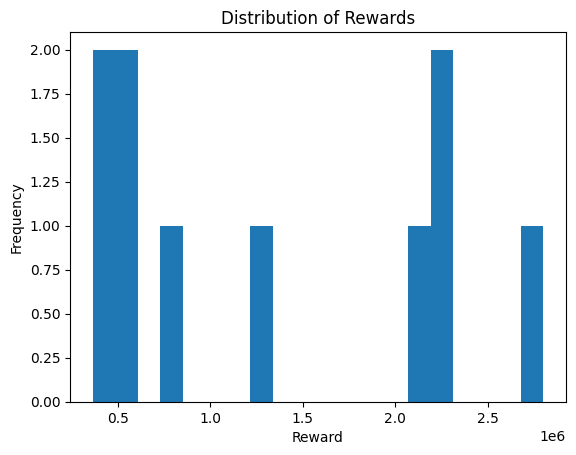

In [8]:
# plot the results
import matplotlib.pyplot as plt

plt.hist(episode_rewards, bins=20)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Rewards')
plt.show()

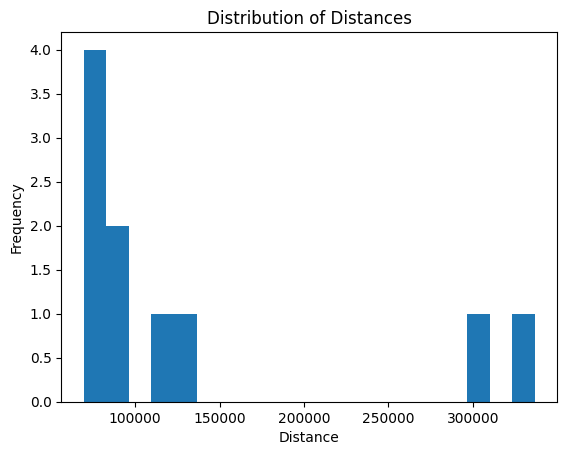

In [9]:
# plot the results
import matplotlib.pyplot as plt

plt.hist(distances, bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
plt.show()


Text(0.5, 1.0, 'Distribution of Load Deviations')

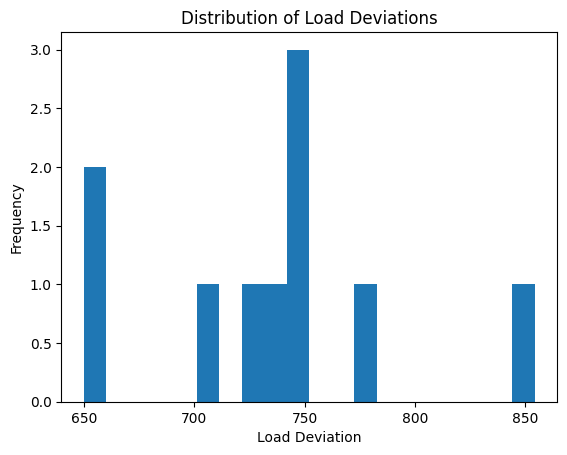

In [10]:
# plot the results
import matplotlib.pyplot as plt

plt.hist(loads, bins=20)
plt.xlabel('Load Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Load Deviations')

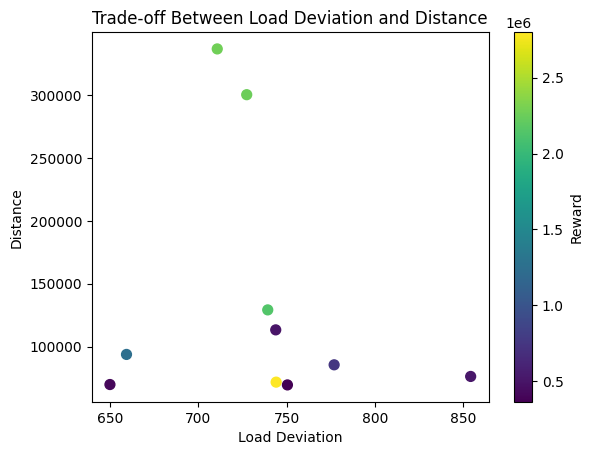

In [11]:
plt.scatter(load_deviations, distances, c=rewards, cmap="viridis", s=50)
plt.colorbar(label="Reward")
plt.xlabel("Load Deviation")
plt.ylabel("Distance")
plt.title("Trade-off Between Load Deviation and Distance")
plt.show()


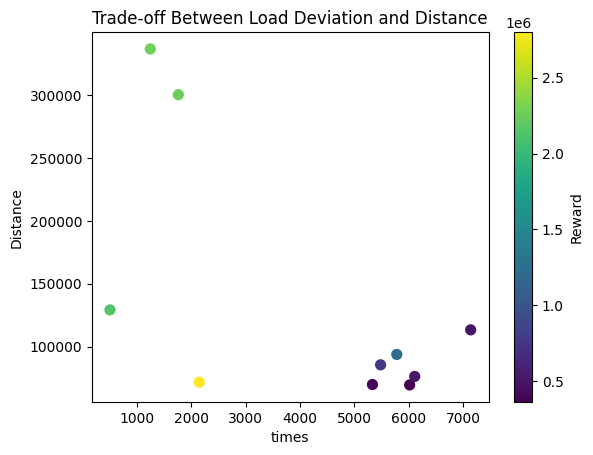

In [12]:
plt.scatter(times, distances, c=rewards, cmap="viridis", s=50)
plt.colorbar(label="Reward")
plt.xlabel("times")
plt.ylabel("Distance")
plt.title("Trade-off Between Load Deviation and Distance")
plt.show()


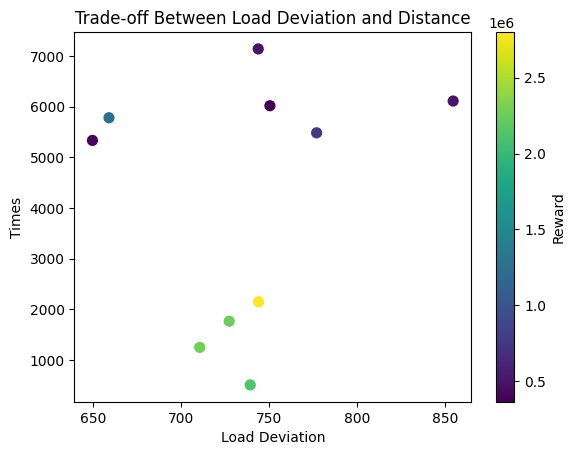

In [13]:
plt.scatter(load_deviations, times, c=rewards, cmap="viridis", s=50)
plt.colorbar(label="Reward")
plt.xlabel("Load Deviation")
plt.ylabel("Times")
plt.title("Trade-off Between Load Deviation and Distance")
plt.show()


1- Intro
2- Methodology
3- Results
    3.1- Learning curves
    3.2- Here, 
4- Discussion
5- Limitations, mistakes and future works
6- Comparison to IP